In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Loading Data

### Non-normalized Data

In [ ]:
train_df = pd.read_csv('./drive/Shareddrives/DATA 298A/DATA/train_df.csv')
pd.set_option('display.max_columns',None)
train_df.head()

,Year,Month,Day,Hour,GHI,TmpF,output,dew,humidity,precip,snow,sealevelpressure,cloudcover,visibility,solarradiation,date,Clear,"Freezing Drizzle/Freezing Rain, Overcast","Ice, Overcast",Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy","Snow, Overcast","Snow, Partially cloudy","Snow, Rain, Overcast","Snow, Rain, Partially cloudy"
0,2016,10,1,0,-0.672394,-0.015725,0.0,0.350440,1.183695,0.585249,-0.067377,-0.222912,0.700275,-1.706011,-0.644881,2016-10-01,0,0,0,0,0,0,0,1,0,0,0,0
1,2016,10,1,1,-0.672394,-0.019418,0.0,0.350440,1.390147,-0.023998,-0.067377,-0.207836,1.298193,-1.451450,-0.644881,2016-10-01,0,0,0,0,0,0,1,0,0,0,0,0
2,2016,10,1,2,-0.672388,-0.012582,0.0,0.388652,1.529460,-0.176310,-0.067377,-0.192761,1.439519,-3.360655,-0.644881,2016-10-01,0,0,0,1,0,0,0,0,0,0,0,0
3,2016,10,1,3,-0.672142,-0.004794,1.0,0.388652,1.426514,0.463400,-0.067377,-0.192761,1.377010,-3.233375,-0.644881,2016-10-01,0,0,0,0,0,0,1,0,0,0,0,0
4,2016,10,1,4,-0.671767,0.002994,0.0,0.394111,1.495890,-0.176310,-0.067377,-0.222912,1.377010,-3.106094,-0.644881,2016-10-01,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
val_df = pd.read_csv('./drive/Shareddrives/DATA 298A/DATA/valaidation_df.csv')
val_df.head()

,Year,Month,Day,Hour,GHI,TmpF,output,dew,humidity,precip,snow,sealevelpressure,cloudcover,visibility,solarradiation,date,Clear,"Freezing Drizzle/Freezing Rain, Overcast","Ice, Overcast",Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy","Snow, Overcast","Snow, Partially cloudy","Snow, Rain, Overcast","Snow, Rain, Partially cloudy"
0,2021,1,1,1,-0.671651,-1.075944,0.0,-0.948791,0.783101,-0.176310,-0.067377,1.013285,1.439519,0.203195,-0.644881,2021-01-01,0,0,0,1,0,0,0,0,0,0,0,0
1,2021,1,1,2,-0.671352,-1.063800,0.0,-0.948791,0.783101,-0.176310,-0.067377,0.847454,1.439519,0.203195,-0.644881,2021-01-01,0,0,0,1,0,0,0,0,0,0,0,0
2,2021,1,1,3,-0.671054,-1.051656,0.0,-0.921496,0.781982,-0.176310,-0.067377,0.757000,1.439519,0.266835,-0.644881,2021-01-01,0,0,0,1,0,0,0,0,0,0,0,0
3,2021,1,1,4,-0.670826,-1.039512,0.0,-0.899660,0.860870,-0.176310,-0.067377,0.696698,1.439519,0.012274,-0.644881,2021-01-01,0,0,0,1,0,0,0,0,0,0,0,0
4,2021,1,1,5,-0.670678,-1.027369,0.0,-0.845071,1.112640,0.128314,-0.067377,0.576093,1.439519,-3.106094,-0.644881,2021-01-01,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
test_df = pd.read_csv('./drive/Shareddrives/DATA 298A/DATA/test_df.csv')
test_df.head()

,Year,Month,Day,Hour,GHI,TmpF,output,dew,humidity,precip,snow,sealevelpressure,cloudcover,visibility,solarradiation,date,Clear,"Freezing Drizzle/Freezing Rain, Overcast","Ice, Overcast",Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy","Snow, Overcast","Snow, Partially cloudy","Snow, Rain, Overcast","Snow, Rain, Partially cloudy"
0,2021,9,1,0,-0.627390,-0.345371,0.0,1.218413,1.491974,1.377271,-0.067377,-2.062132,1.439519,-1.642370,-0.644881,2021-09-01,0,0,0,0,0,0,1,0,0,0,0,0
1,2021,9,1,1,-0.623070,-0.344947,0.0,1.218413,1.555196,0.341550,-0.067377,-2.077208,1.439519,-0.560488,-0.644881,2021-09-01,0,0,0,0,0,0,1,0,0,0,0,0
2,2021,9,1,2,-0.618749,-0.344523,0.0,1.196577,1.488617,0.067389,-0.067377,-2.137510,1.439519,-0.496847,-0.644881,2021-09-01,0,0,0,0,0,0,1,0,0,0,0,0
3,2021,9,1,3,-0.614429,-0.344099,0.0,1.163823,1.390147,1.346809,-0.067377,-2.077208,1.439519,-0.560488,-0.644881,2021-09-01,0,0,0,0,0,0,1,0,0,0,0,0
4,2021,9,1,4,-0.610108,-0.343675,0.0,1.147447,1.325806,0.097851,-0.067377,-2.062132,1.439519,-0.433207,-0.644881,2021-09-01,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
print('Train Dataset:',train_df.shape)
print('Validation Dataset:',val_df.shape)
print('Test Dataset:',test_df.shape)

Train Dataset: (37273, 28)
Validation Dataset: (5831, 28)
Test Dataset: (10224, 28)


In [ ]:
# remove 'date' column that has the full date
train_df.drop(columns='date', inplace=True)
val_df.drop(columns='date', inplace=True)
test_df.drop(columns='date', inplace=True)

print('Train Dataset:',train_df.shape)
print('Validation Dataset:',val_df.shape)
print('Test Dataset:',test_df.shape)

Train Dataset: (37273, 27)
Validation Dataset: (5831, 27)
Test Dataset: (10224, 27)


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37273 entries, 0 to 37272
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Year                                      37273 non-null  int64  
 1   Month                                     37273 non-null  int64  
 2   Day                                       37273 non-null  int64  
 3   Hour                                      37273 non-null  int64  
 4   GHI                                       37273 non-null  float64
 5   TmpF                                      37273 non-null  float64
 6   output                                    37273 non-null  float64
 7   dew                                       37273 non-null  float64
 8   humidity                                  37273 non-null  float64
 9   precip                                    37273 non-null  float64
 10  snow                              

In [ ]:
train_df.isnull().sum()

Year                                        0
Month                                       0
Day                                         0
Hour                                        0
GHI                                         0
TmpF                                        0
output                                      0
dew                                         0
humidity                                    0
precip                                      0
snow                                        0
sealevelpressure                            0
cloudcover                                  0
visibility                                  0
solarradiation                              0
Clear                                       0
Freezing Drizzle/Freezing Rain, Overcast    0
Ice, Overcast                               0
Overcast                                    0
Partially cloudy                            0
Rain                                        0
Rain, Overcast                    

### Standardized Data

In [ ]:
train_stdf0 = pd.read_csv('./drive/Shareddrives/DATA 298A/DATA/train_stdf.csv')
pd.set_option('display.max_columns',None)
train_stdf0.head()

,Year,Month,Day,Hour,GHI,TmpF,output,dew,humidity,precip,snow,sealevelpressure,cloudcover,visibility,solarradiation,date,Clear,"Freezing Drizzle/Freezing Rain, Overcast","Ice, Overcast",Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy","Snow, Overcast","Snow, Partially cloudy","Snow, Rain, Overcast","Snow, Rain, Partially cloudy"
0,2016,10,1,0,0.000000,56.997313,0.0,53.3,87.78,0.025,0.0,1016.3,72.8,6.6,0.0,2016-10-01,0,0,0,0,0,0,0,1,0,0,0,0
1,2016,10,1,1,0.000000,56.929524,0.0,53.3,91.47,0.005,0.0,1016.4,94.8,7.0,0.0,2016-10-01,0,0,0,0,0,0,1,0,0,0,0,0
2,2016,10,1,2,0.001702,57.055018,0.0,54.0,93.96,0.000,0.0,1016.5,100.0,4.0,0.0,2016-10-01,0,0,0,1,0,0,0,0,0,0,0,0
3,2016,10,1,3,0.065986,57.198007,1.0,54.0,92.12,0.021,0.0,1016.5,97.7,4.2,0.0,2016-10-01,0,0,0,0,0,0,1,0,0,0,0,0
4,2016,10,1,4,0.163879,57.340995,0.0,54.1,93.36,0.000,0.0,1016.3,97.7,4.4,0.0,2016-10-01,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
val_stdf0 = pd.read_csv('./drive/Shareddrives/DATA 298A/DATA/val_stdf.csv')
val_stdf0.head()

,Year,Month,Day,Hour,GHI,TmpF,output,dew,humidity,precip,snow,sealevelpressure,cloudcover,visibility,solarradiation,date,Clear,"Freezing Drizzle/Freezing Rain, Overcast","Ice, Overcast",Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy","Snow, Overcast","Snow, Partially cloudy","Snow, Rain, Overcast","Snow, Rain, Partially cloudy"
0,2021,1,1,1,-0.671651,-1.075944,0.0,-0.948791,0.783101,-0.176310,-0.067377,1.013285,1.439519,0.203195,-0.644881,2021-01-01,0,0,0,1,0,0,0,0,0,0,0,0
1,2021,1,1,2,-0.671352,-1.063800,0.0,-0.948791,0.783101,-0.176310,-0.067377,0.847454,1.439519,0.203195,-0.644881,2021-01-01,0,0,0,1,0,0,0,0,0,0,0,0
2,2021,1,1,3,-0.671054,-1.051656,0.0,-0.921496,0.781982,-0.176310,-0.067377,0.757000,1.439519,0.266835,-0.644881,2021-01-01,0,0,0,1,0,0,0,0,0,0,0,0
3,2021,1,1,4,-0.670826,-1.039512,0.0,-0.899660,0.860870,-0.176310,-0.067377,0.696698,1.439519,0.012274,-0.644881,2021-01-01,0,0,0,1,0,0,0,0,0,0,0,0
4,2021,1,1,5,-0.670678,-1.027369,0.0,-0.845071,1.112640,0.128314,-0.067377,0.576093,1.439519,-3.106094,-0.644881,2021-01-01,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
test_stdf0 = pd.read_csv('./drive/Shareddrives/DATA 298A/DATA/test_stdf.csv')
test_stdf0.head()

,Year,Month,Day,Hour,GHI,TmpF,output,dew,humidity,precip,snow,sealevelpressure,cloudcover,visibility,solarradiation,date,Clear,"Freezing Drizzle/Freezing Rain, Overcast","Ice, Overcast",Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy","Snow, Overcast","Snow, Partially cloudy","Snow, Rain, Overcast","Snow, Rain, Partially cloudy"
0,2021,9,1,0,11.765049,50.945201,0.0,69.2,93.29,0.051,0.0,1004.1,100.0,6.7,0.0,2021-09-01,0,0,0,0,0,0,1,0,0,0,0,0
1,2021,9,1,1,12.894517,50.952983,0.0,69.2,94.42,0.017,0.0,1004.0,100.0,8.4,0.0,2021-09-01,0,0,0,0,0,0,1,0,0,0,0,0
2,2021,9,1,2,14.023986,50.960765,0.0,68.8,93.23,0.008,0.0,1003.6,100.0,8.5,0.0,2021-09-01,0,0,0,0,0,0,1,0,0,0,0,0
3,2021,9,1,3,15.153455,50.968547,0.0,68.2,91.47,0.050,0.0,1004.0,100.0,8.4,0.0,2021-09-01,0,0,0,0,0,0,1,0,0,0,0,0
4,2021,9,1,4,16.282923,50.976329,0.0,67.9,90.32,0.009,0.0,1004.1,100.0,8.6,0.0,2021-09-01,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
# remove 'date' column that has the full date
train_stdf0.drop(columns='date', inplace=True)
val_stdf0.drop(columns='date', inplace=True)
test_stdf0.drop(columns='date', inplace=True)

print('Train Dataset:',train_stdf0.shape)
print('Validation Dataset:',val_stdf0.shape)
print('Test Dataset:',test_stdf0.shape)

Train Dataset: (37273, 27)
Validation Dataset: (5831, 27)
Test Dataset: (10224, 27)


### Standardized Data NO 0 output

In [ ]:
train_stdf = pd.read_csv('./drive/Shareddrives/DATA 298A/DATA/train_df_no0_scaled.csv')
pd.set_option('display.max_columns',None)
train_stdf.head()

,Year,Month,Day,Hour,GHI,TmpF,output,dew,humidity,precip,snow,sealevelpressure,cloudcover,visibility,solarradiation,date
0,2016,10,1,3,-1.143079,-0.272506,1.0,0.325886,1.492652,0.514650,-0.045143,-0.208282,1.403860,-3.059949,-1.046464,2016-10-01
1,2016,10,1,7,-1.064765,-0.240862,208.0,0.331360,1.382033,-0.176102,-0.045143,-0.223053,1.469317,-1.842624,-1.045319,2016-10-01
2,2016,10,1,8,-1.076574,-0.217895,193.0,0.380626,1.423381,-0.176102,-0.045143,-0.163969,1.469317,-2.451286,-0.901080,2016-10-01
3,2016,10,1,9,-0.855667,-0.185494,971.0,0.391574,1.392235,-0.176102,-0.045143,-0.090114,1.469317,-3.181681,-0.640839,2016-10-01
4,2016,10,1,10,-0.614201,-0.140744,1847.0,0.424419,1.339074,-0.176102,-0.045143,-0.075343,1.469317,-2.573019,-0.622523,2016-10-01


In [ ]:
val_stdf = pd.read_csv('./drive/Shareddrives/DATA 298A/DATA/val_df_no0_scaled.csv')
val_stdf.head()

,Year,Month,Day,Hour,GHI,TmpF,output,dew,humidity,precip,snow,sealevelpressure,cloudcover,visibility,solarradiation,date
0,2021,1,1,8,-1.163743,-1.259442,40.0,-0.851896,1.449028,3.574936,-0.089366,-0.191191,1.319176,-4.216903,-0.975485,2021-01-01
1,2021,1,1,9,-1.131649,-1.245206,136.0,-0.793012,1.476743,8.968551,-0.089366,-0.270879,1.319176,-4.347018,-0.971708,2021-01-01
2,2021,1,1,10,-1.068456,-1.140899,344.0,-0.760893,1.498481,3.496388,-0.089366,-0.478069,1.319176,-1.159217,-0.945269,2021-01-01
3,2021,1,1,11,-0.651713,-0.994364,1792.0,-0.669890,1.445767,0.799581,-0.089366,-0.621507,1.319176,-0.248417,-0.949046,2021-01-01
4,2021,1,1,12,-0.272570,-0.744468,3496.0,-0.573534,1.371860,1.349415,-0.089366,-0.828697,1.319176,-1.094160,-0.949046,2021-01-01


In [ ]:
test_stdf = pd.read_csv('./drive/Shareddrives/DATA 298A/DATA/test_df_no0_scaled.csv')
test_stdf.head()

,Year,Month,Day,Hour,GHI,TmpF,output,dew,humidity,precip,snow,sealevelpressure,cloudcover,visibility,solarradiation,date
0,2021,9,1,6,-1.194333,-0.419343,72.0,1.058545,1.330608,-0.181593,-0.055333,-2.068258,1.435568,0.310643,-1.102007,2021-09-01
1,2021,9,1,7,-1.190244,-0.418918,520.0,1.047124,1.336330,-0.181593,-0.055333,-1.968490,0.912040,0.310643,-1.013486,2021-09-01
2,2021,9,1,8,-1.186154,-0.418493,472.0,1.058545,1.330608,-0.181593,-0.055333,-1.785583,1.435568,0.310643,-1.064983,2021-09-01
3,2021,9,1,9,-1.182064,-0.418068,3120.0,0.892945,0.953472,-0.181593,-0.055333,-1.635931,0.693903,0.310643,-0.482694,2021-09-01
4,2021,9,1,10,-1.177974,-0.417643,5432.0,0.870104,0.552407,-0.181593,-0.055333,-1.569419,-0.017768,0.310643,0.069302,2021-09-01


In [ ]:
# remove 'date' column that has the full date
'''
train_stdf.drop(columns='date', inplace=True)
val_stdf.drop(columns='date', inplace=True)
test_stdf.drop(columns='date', inplace=True)
'''
print('Train Dataset:',train_stdf.shape)
print('Validation Dataset:',val_stdf.shape)
print('Test Dataset:',test_stdf.shape)

Train Dataset: (19441, 16)
Validation Dataset: (3145, 16)
Test Dataset: (5275, 16)


### SVD Data

In [ ]:
train_svddf = pd.read_csv('./drive/Shareddrives/DATA 298A/DATA/train_svddf.csv')
pd.set_option('display.max_columns',None)
train_svddf.head()

,0,1,2,3,4,5,6,7,8,9,date,output
0,2015.935822,-14.664347,11.568998,-3.463630,1.586247,1.166781,0.747309,-0.250051,-0.103758,-0.159947,2016-10-01,0.0
1,2015.941525,-14.662213,10.580271,-3.453995,1.711157,1.159595,0.560747,0.297023,-0.623866,-0.549343,2016-10-01,0.0
2,2015.947270,-14.658473,9.615297,-3.421102,2.442592,1.595357,1.356669,0.160470,-0.548892,-1.482548,2016-10-01,0.0
3,2015.952915,-14.658942,8.608738,-3.427358,2.499392,1.741258,1.540374,-0.283406,-0.249036,-1.007925,2016-10-01,1.0
4,2015.958660,-14.659665,7.614570,-3.428215,2.419139,1.546173,1.197475,0.181384,-0.528564,-1.432994,2016-10-01,0.0


In [ ]:
val_svddf = pd.read_csv('./drive/Shareddrives/DATA 298A/DATA/val_svddf.csv')
val_svddf.head()

,0,1,2,3,4,5,6,7,8,9,date,output
0,2020.911881,-14.766299,10.580888,5.678533,1.145864,-0.612953,0.044178,0.406225,-1.182036,-0.274312,2021-01-01,0.0
1,2020.917576,-14.765509,9.582230,5.676463,1.193541,-0.525326,-0.005729,0.430413,-1.179043,-0.240223,2021-01-01,0.0
2,2020.923271,-14.765218,8.582999,5.671938,1.213584,-0.473053,-0.073212,0.453281,-1.177796,-0.218139,2021-01-01,0.0
3,2020.928966,-14.764425,7.592474,5.670501,1.362338,-0.342214,0.007399,0.403644,-1.115931,-0.364228,2021-01-01,0.0
4,2020.934582,-14.759119,6.647140,5.698085,2.475316,0.616283,1.438740,-0.473238,-0.322340,-1.424144,2021-01-01,0.0


In [ ]:
test_svddf = pd.read_csv('./drive/Shareddrives/DATA 298A/DATA/test_svddf.csv')
test_svddf.head()

,0,1,2,3,4,5,6,7,8,9,date,output
0,2020.932300,-14.687896,11.607772,-2.491823,2.042395,2.875295,0.621211,-0.027337,-0.456240,0.788812,2021-09-01,0.0
1,2020.937995,-14.691269,10.601314,-2.514899,1.550775,2.403553,-0.283913,0.675791,-0.808832,0.514053,2021-09-01,0.0
2,2020.943690,-14.692079,9.599352,-2.514264,1.502232,2.322486,-0.435101,0.824874,-0.868821,0.404045,2021-09-01,0.0
3,2020.949385,-14.690905,8.594969,-2.501707,1.801240,2.584140,0.111415,0.190135,-0.619253,1.127105,2021-09-01,0.0
4,2020.955080,-14.694000,7.594452,-2.506646,1.529573,2.214679,-0.434792,0.799715,-0.861701,0.435271,2021-09-01,0.0


In [ ]:
# remove 'date' column that has the full date
train_svddf.drop(columns='date', inplace=True)
val_svddf.drop(columns='date', inplace=True)
test_svddf.drop(columns='date', inplace=True)

print('Train Dataset:',train_svddf.shape)
print('Validation Dataset:',val_svddf.shape)
print('Test Dataset:',test_svddf.shape)

Train Dataset: (37273, 11)
Validation Dataset: (5831, 11)
Test Dataset: (10224, 11)


### SVD Data (not all data)

In [ ]:
train_svddfd = pd.read_csv('./drive/Shareddrives/DATA 298A/DATA/train_svddfd.csv')
pd.set_option('display.max_columns',None)
train_svddfd.head()

,0,1,2,3,4,5,6,7,8,9,date,output
0,2015.935871,-14.664821,11.570362,-3.471392,1.383830,1.274393,0.757942,-0.243560,-0.143148,-0.168956,2016-10-01,0.0
1,2015.941566,-14.663104,10.580013,-3.461365,1.472829,1.258748,0.499960,0.037441,-0.876829,-0.506845,2016-10-01,0.0
2,2015.947261,-14.659832,9.614595,-3.436153,2.123118,1.837579,1.361867,-0.101310,-0.749229,-1.394259,2016-10-01,0.0
3,2015.952956,-14.659863,8.608450,-3.435014,2.195288,1.943426,1.550173,-0.317378,-0.452999,-0.976494,2016-10-01,1.0
4,2015.958651,-14.661046,7.613835,-3.443089,2.106928,1.788281,1.200899,-0.073960,-0.720443,-1.347255,2016-10-01,0.0


In [ ]:
val_svddfd = pd.read_csv('./drive/Shareddrives/DATA 298A/DATA/val_svddfd.csv')
val_svddfd.head()

,0,1,2,3,4,5,6,7,8,9,date,output
0,2020.911872,-14.767689,10.580311,5.665823,1.098460,-0.520657,-0.061854,-0.169438,-1.048250,-0.213112,2021-01-01,0.0
1,2020.917567,-14.766911,9.581639,5.663772,1.136543,-0.425839,-0.109429,-0.144685,-1.071402,-0.173949,2021-01-01,0.0
2,2020.923262,-14.766632,8.582394,5.659288,1.151055,-0.369895,-0.176267,-0.122750,-1.083803,-0.149525,2021-01-01,0.0
3,2020.928957,-14.765851,7.591854,5.657830,1.285523,-0.218529,-0.084143,-0.138706,-1.042600,-0.294396,2021-01-01,0.0
4,2020.934652,-14.759414,6.647281,5.691911,2.359744,0.888959,1.481365,-0.553836,-0.468467,-1.379478,2021-01-01,0.0


In [ ]:
test_svddfd = pd.read_csv('./drive/Shareddrives/DATA 298A/DATA/test_svddfd.csv')
test_svddfd.head()

,0,1,2,3,4,5,6,7,8,9,date,output
0,2020.932341,-14.688795,11.607575,-2.499735,1.611991,3.022604,0.615993,-0.170830,-0.687852,0.857241,2021-09-01,0.0
1,2020.938036,-14.692174,10.601101,-2.522517,1.173363,2.487489,-0.349253,0.310049,-1.251602,0.609014,2021-09-01,0.0
2,2020.943731,-14.692995,9.599124,-2.521795,1.133997,2.400607,-0.509936,0.419668,-1.378481,0.507734,2021-09-01,0.0
3,2020.949426,-14.691836,8.594724,-2.509283,1.404353,2.701970,0.076943,-0.048052,-0.840759,1.197738,2021-09-01,0.0
4,2020.955121,-14.694939,7.594191,-2.514024,1.173911,2.297307,-0.510036,0.399519,-1.350859,0.535884,2021-09-01,0.0


In [ ]:
# remove 'date' column that has the full date
train_svddfd.drop(columns='date', inplace=True)
val_svddfd.drop(columns='date', inplace=True)
test_svddfd.drop(columns='date', inplace=True)

print('Train Dataset:',train_svddfd.shape)
print('Validation Dataset:',val_svddfd.shape)
print('Test Dataset:',test_svddfd.shape)

Train Dataset: (37273, 11)
Validation Dataset: (5831, 11)
Test Dataset: (10224, 11)


### Daily Data

In [ ]:
train_df_daily = pd.read_csv('./drive/Shareddrives/DATA 298A/DATA/train_df_daily.csv')
pd.set_option('display.max_columns',None)
train_df_daily.head()

,date,GHI,TmpF,dew,humidity,snow,sealevelpressure,cloudcover,visibility,solarradiation,precip,output,year,month,day
0,2016-10-01,-0.381998,0.183330,0.509887,1.043404,-0.067377,-0.172032,1.229908,-1.507135,-0.071331,-2.251388,23159.0,2016,10,1
1,2016-10-02,-0.240956,0.410622,0.649090,0.571824,-0.067377,-0.011854,1.369876,-0.152130,0.200415,-3.926819,34483.0,2016,10,2
2,2016-10-03,-0.023247,0.461243,0.475996,0.268418,-0.067377,0.010759,-0.257526,-0.825655,0.167356,-4.231443,52849.0,2016,10,3
3,2016-10-04,0.040015,0.655615,0.548099,-0.075038,-0.067377,-0.105448,-0.131374,0.311913,0.249336,-4.231443,59870.0,2016,10,4
4,2016-10-05,0.066871,0.737008,0.666604,-0.244587,-0.067377,0.087394,0.075066,0.394115,0.229032,-4.231443,62184.0,2016,10,5


In [ ]:
val_df_daily = pd.read_csv('./drive/Shareddrives/DATA 298A/DATA/val_df_daily.csv')
val_df_daily.head()

,date,GHI,TmpF,dew,humidity,snow,sealevelpressure,cloudcover,visibility,solarradiation,precip,output,year,month,day
0,2021-01-01,-0.420873,-0.444071,-0.400621,0.871804,-0.067377,-0.608595,1.197748,-0.565791,-0.510908,26.170005,18304.0,2021,1,1
1,2021-01-02,-0.564055,-0.841014,-0.652188,0.553058,-0.067377,-0.180198,1.403961,0.195239,-0.594208,-4.231443,6768.0,2021,1,2
2,2021-01-03,-0.560449,-1.052335,-0.733162,0.764079,-0.067377,-0.168891,1.332053,-0.417297,-0.607917,-3.256647,7040.0,2021,1,3
3,2021-01-04,-0.198660,-1.045748,-0.879872,0.597957,-0.067377,-0.117383,-0.728273,-0.849520,-0.363035,-4.231443,44128.0,2021,1,4
4,2021-01-05,-0.606897,-1.140576,-0.875550,0.577023,-0.067377,0.159631,1.427742,-0.069928,-0.617289,-3.835432,4408.0,2021,1,5


In [ ]:
test_df_daily = pd.read_csv('./drive/Shareddrives/DATA 298A/DATA/test_df_daily.csv')
test_df_daily.head()

,date,GHI,TmpF,dew,humidity,snow,sealevelpressure,cloudcover,visibility,solarradiation,precip,output,year,month,day
0,2021-09-01,-0.577704,-0.340496,0.961160,0.280983,-0.067377,-1.485491,0.246514,0.158116,0.367777,0.094214,53000.0,2021,9,1
1,2021-09-02,-0.474013,-0.330323,0.489870,-0.311772,-0.067377,-0.148790,-1.032215,0.394115,0.482470,-4.231443,78088.0,2021,9,2
2,2021-09-03,-0.370321,-0.320150,0.501926,-0.322542,-0.067377,0.045308,-0.549577,0.394115,0.421036,-4.231443,72408.0,2021,9,3
3,2021-09-04,-0.266629,-0.309978,0.834012,0.167617,-0.067377,-0.437739,-0.312335,0.380857,0.128795,-4.048668,54136.0,2021,9,4
4,2021-09-05,-0.162937,-0.299805,1.065107,0.840262,-0.067377,-0.893775,0.978851,-0.966194,-0.161798,28.241446,16200.0,2021,9,5


In [ ]:
# remove 'date' column that has the full date
train_df_daily.drop(columns='date', inplace=True)
val_df_daily.drop(columns='date', inplace=True)
test_df_daily.drop(columns='date', inplace=True)

print('Train Dataset:',train_df_daily.shape)
print('Validation Dataset:',val_df_daily.shape)
print('Test Dataset:',test_df_daily.shape)

Train Dataset: (1553, 14)
Validation Dataset: (243, 14)
Test Dataset: (426, 14)


### Daily Data - Standardized

In [ ]:
train_daily_std = pd.read_csv('./drive/Shareddrives/DATA 298A/DATA/train_daily_scaled.csv')
pd.set_option('display.max_columns',None)
train_daily_std.head()

,date,GHI,TmpF,dew,humidity,snow,sealevelpressure,cloudcover,visibility,solarradiation,precip,output,year,month,day
0,2016-10-01,-0.911144,0.189517,0.543633,1.533085,-0.133726,-0.190797,1.580204,-2.268354,-0.134032,-0.232540,23159.0,2016,10,1
1,2016-10-02,-0.547337,0.438511,0.685913,0.824246,-0.133726,-0.026193,1.760792,-0.181476,0.625929,-0.391188,34483.0,2016,10,2
2,2016-10-03,0.014224,0.493965,0.508993,0.368191,-0.133726,-0.002955,-0.338909,-1.218789,0.533475,-0.420033,52849.0,2016,10,3
3,2016-10-04,0.177402,0.706897,0.582691,-0.148064,-0.133726,-0.122373,-0.176146,0.533208,0.762740,-0.420033,59870.0,2016,10,4
4,2016-10-05,0.246676,0.796062,0.703815,-0.402916,-0.133726,0.075797,0.090207,0.659810,0.705958,-0.420033,62184.0,2016,10,5


In [ ]:
val_daily_std = pd.read_csv('./drive/Shareddrives/DATA 298A/DATA/val_daily_scaled.csv')
val_daily_std.head()

,date,GHI,TmpF,dew,humidity,snow,sealevelpressure,cloudcover,visibility,solarradiation,precip,output,year,month,day
0,2021-01-01,-1.182504,-0.516409,-0.380634,1.479329,-0.277355,-0.714546,1.380353,-0.837841,-1.320717,2.452647,18304.0,2021,1,1
1,2021-01-02,-1.536263,-0.879409,-0.624515,0.992856,-0.277355,-0.238342,1.639755,0.351472,-1.560318,-0.393412,6768.0,2021,1,2
2,2021-01-03,-1.527355,-1.072660,-0.703015,1.314918,-0.277355,-0.225773,1.549299,-0.605780,-1.599753,-0.302155,7040.0,2021,1,3
3,2021-01-04,-0.633485,-1.066637,-0.845242,1.061382,-0.277355,-0.168517,-1.042435,-1.281244,-0.895374,-0.393412,44128.0,2021,1,4
4,2021-01-05,-1.642114,-1.153356,-0.841053,1.029431,-0.277355,0.139410,1.669669,-0.062923,-1.626708,-0.356339,4408.0,2021,1,5


In [ ]:
test_daily_std = pd.read_csv('./drive/Shareddrives/DATA 298A/DATA/test_daily_scaled.csv')
test_daily_std.head()

,date,GHI,TmpF,dew,humidity,snow,sealevelpressure,cloudcover,visibility,solarradiation,precip,output,year,month,day
0,2021-09-01,-1.448266,-0.191226,0.975436,0.462527,-0.153603,-1.642958,0.365514,0.049029,0.720474,0.077540,53000.0,2021,9,1
1,2021-09-02,-1.213210,-0.180115,0.480832,-0.429740,-0.153603,-0.091687,-1.231375,0.525784,1.020867,-0.415268,78088.0,2021,9,2
2,2021-09-03,-0.978154,-0.169005,0.493484,-0.445952,-0.153603,0.133569,-0.628653,0.525784,0.859967,-0.415268,72408.0,2021,9,3
3,2021-09-04,-0.743098,-0.157894,0.841998,0.291878,-0.153603,-0.427018,-0.332383,0.499000,0.094554,-0.394445,54136.0,2021,9,4
4,2021-09-05,-0.508043,-0.146784,1.084526,1.304403,-0.153603,-0.956258,1.280062,-2.222250,-0.666541,3.284258,16200.0,2021,9,5


In [ ]:
# remove 'date' column that has the full date
train_daily_std.drop(columns='date', inplace=True)
val_daily_std.drop(columns='date', inplace=True)
test_daily_std.drop(columns='date', inplace=True)

print('Train Dataset:',train_daily_std.shape)
print('Validation Dataset:',val_daily_std.shape)
print('Test Dataset:',test_daily_std.shape)

Train Dataset: (1553, 14)
Validation Dataset: (243, 14)
Test Dataset: (426, 14)


# Diving the Sets

## Non-normalized data

In [ ]:
x_train = train_df.drop(columns='output')
y_train = train_df['output']
x_val = val_df.drop(columns='output')
y_val = val_df['output']
x_test = test_df.drop(columns='output')
y_test = test_df['output']

In [ ]:
print('Train Dataset:',x_train.shape, y_train.shape)
print('Validation Dataset:',x_val.shape, y_val.shape)
print('Test Dataset:',x_test.shape, y_test.shape)

Train Dataset: (37273, 26) (37273,)
Validation Dataset: (5831, 26) (5831,)
Test Dataset: (10224, 26) (10224,)


## Standardized data

In [ ]:
xst_train0 = train_stdf0.drop(columns='output')
y_train0 = train_stdf0['output']
xst_val0 = val_stdf0.drop(columns='output')
y_val0 = val_stdf0['output']
xst_test0 = test_stdf0.drop(columns='output')
y_test0 = test_stdf0['output']

print('Train Dataset:',xst_train0.shape, y_train0.shape)
print('Validation Dataset:',xst_val0.shape, y_val0.shape)
print('Test Dataset:',xst_test0.shape, y_test0.shape)

Train Dataset: (37273, 26) (37273,)
Validation Dataset: (5831, 26) (5831,)
Test Dataset: (10224, 26) (10224,)


## Hourly - 0 removed

In [ ]:
xst_train = train_stdf.drop(columns=['output', 'date'])
y_train = train_stdf['output']
xst_val = val_stdf.drop(columns=['output', 'date'])
y_val = val_stdf['output']
xst_test = test_stdf.drop(columns=['output', 'date'])
y_test = test_stdf['output']

print('Train Dataset:',xst_train.shape, y_train.shape)
print('Validation Dataset:',xst_val.shape, y_val.shape)
print('Test Dataset:',xst_test.shape, y_test.shape)

Train Dataset: (19441, 14) (19441,)
Validation Dataset: (3145, 14) (3145,)
Test Dataset: (5275, 14) (5275,)


## SVD Data

In [ ]:
xsvd_train = train_svddf.drop(columns='output')
y_train = train_svddf['output']
xsvd_val = val_svddf.drop(columns='output')
y_val = val_svddf['output']
xsvd_test = test_svddf.drop(columns='output')
y_test = test_svddf['output']

print('Train Dataset:',xsvd_train.shape, y_train.shape)
print('Validation Dataset:',xsvd_val.shape, y_val.shape)
print('Test Dataset:',xsvd_test.shape, y_test.shape)

Train Dataset: (37273, 10) (37273,)
Validation Dataset: (5831, 10) (5831,)
Test Dataset: (10224, 10) (10224,)


## SVD Data (not all columns)

In [ ]:
xsvdd_train = train_svddfd.drop(columns='output')
y_train = train_svddfd['output']
xsvdd_val = val_svddfd.drop(columns='output')
y_val = val_svddfd['output']
xsvdd_test = test_svddfd.drop(columns='output')
y_test = test_svddfd['output']

print('Train Dataset:',xsvdd_train.shape, y_train.shape)
print('Validation Dataset:',xsvdd_val.shape, y_val.shape)
print('Test Dataset:',xsvdd_test.shape, y_test.shape)

Train Dataset: (37273, 10) (37273,)
Validation Dataset: (5831, 10) (5831,)
Test Dataset: (10224, 10) (10224,)


## Daily Data - NonNormalized

In [ ]:
xdaily_train = train_df_daily.drop(columns='output')
ydaily_train = train_df_daily['output']
xdaily_val = val_df_daily.drop(columns='output')
ydaily_val = val_df_daily['output']
xdaily_test = test_df_daily.drop(columns='output')
ydaily_test = test_df_daily['output']

print('Train Dataset:',xdaily_train.shape, ydaily_train.shape)
print('Validation Dataset:',xdaily_val.shape, ydaily_val.shape)
print('Test Dataset:',xdaily_test.shape, ydaily_test.shape)

Train Dataset: (1553, 13) (1553,)
Validation Dataset: (243, 13) (243,)
Test Dataset: (426, 13) (426,)


## Daily Data - Standardized

In [ ]:
xdaily_train_std = train_daily_std.drop(columns='output')
ydaily_train = train_daily_std['output']
xdaily_val_std = val_daily_std.drop(columns='output')
ydaily_val = val_daily_std['output']
xdaily_test_std = test_daily_std.drop(columns='output')
ydaily_test = test_daily_std['output']

print('Train Dataset:',xdaily_train.shape, ydaily_train.shape)
print('Validation Dataset:',xdaily_val.shape, ydaily_val.shape)
print('Test Dataset:',xdaily_test.shape, ydaily_test.shape)

Train Dataset: (1553, 13) (1553,)
Validation Dataset: (243, 13) (243,)
Test Dataset: (426, 13) (426,)


# Build Model

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [ ]:
# From 'Optimized Random Forest for Solar Radiation Prediction Using Sunshine Hours', from Villegas-Mier
# Results obtained after determining the best features for the RF algorithm.
# n_estimators: 500, max_features: 4, min_samples_leaf: 2 ,maximum_depth

# Instantiate model with 500 decision trees
rf_500 = RandomForestRegressor(n_estimators=500, max_features=4, min_samples_leaf=2, random_state=42)

In [ ]:
def plot_predictions(test_df, y_test, valid_preds):
    
    rmse = mean_squared_error(y_test, valid_preds, squared=False)
    
    nrows, ncols = 1, 1
    fig, ax = plt.subplots(nrows, ncols, figsize=(20,4))

    ax1 = plt.subplot(nrows, ncols, 1)
    ax1.plot(test_df['date'].values, y_test, c='tab:purple')
    ax1.scatter(test_df['date'].values, valid_preds, s=5, c='#7FB285')
    ax1.set_ylabel('Solar Power Generation')
    ax1.set_xlabel('Date')
    ax1.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax1.set_title('Prediction RMSE: {:.4f}'.format(rmse), fontsize=10)

    plt.tight_layout()
    plt.show()

### Non-normalized Data

#### Train

In [ ]:
x_train.head()

,Year,Month,Day,Hour,GHI,TmpF,dew,humidity,precip,snow,sealevelpressure,cloudcover,visibility,solarradiation,Clear,"Freezing Drizzle/Freezing Rain, Overcast","Ice, Overcast",Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy","Snow, Overcast","Snow, Partially cloudy","Snow, Rain, Overcast","Snow, Rain, Partially cloudy"
0,2016,10,1,0,-0.672394,-0.015725,0.350440,1.183695,0.585249,-0.067377,-0.222912,0.700275,-1.706011,-0.644881,0,0,0,0,0,0,0,1,0,0,0,0
1,2016,10,1,1,-0.672394,-0.019418,0.350440,1.390147,-0.023998,-0.067377,-0.207836,1.298193,-1.451450,-0.644881,0,0,0,0,0,0,1,0,0,0,0,0
2,2016,10,1,2,-0.672388,-0.012582,0.388652,1.529460,-0.176310,-0.067377,-0.192761,1.439519,-3.360655,-0.644881,0,0,0,1,0,0,0,0,0,0,0,0
3,2016,10,1,3,-0.672142,-0.004794,0.388652,1.426514,0.463400,-0.067377,-0.192761,1.377010,-3.233375,-0.644881,0,0,0,0,0,0,1,0,0,0,0,0
4,2016,10,1,4,-0.671767,0.002994,0.394111,1.495890,-0.176310,-0.067377,-0.222912,1.377010,-3.106094,-0.644881,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
# Train the model on training data
rf_500.fit(x_train, y_train)

RandomForestRegressor(max_features=4, min_samples_leaf=2, n_estimators=500,
                      random_state=42)

#### Predict

In [ ]:
y_pred_500 = rf_500.predict(x_test)

#### Evaluate

In [ ]:
mae_500 = mean_absolute_error(y_test, y_pred_500)
print('Mean Absolute Error (MAE):', round(mae_500, 2))
# The model is the most accurate when its MAE is closer to 0.

Mean Absolute Error (MAE): 368.21


In [ ]:
# accuracy
mape_500 = mean_absolute_percentage_error(y_test, y_pred_500)
print('Mean Absolute Percentage Error (MAPE):', round(mape_500, 2))
# A MAPE score of less than 5% indicated that the model has great predictive power.
# In Scikit Learn Library
# Note here that the output is not a percentage in the range [0, 100] and a value
# of 100 does not mean 100% but 1e2. Furthermore, the output can be arbitrarily
# high when y_true is small (which is specific to the metric) or when
# abs(y_true - y_pred) is large (which is common for most regression metrics)

Mean Absolute Percentage Error (MAPE): 3.7410022499540416e+17


In [ ]:
rmse_500 = mean_squared_error(y_test, y_pred_500, squared=False)
print('Root Mean Squared Error (RMSE):', round(rmse_500, 2))

Root Mean Squared Error (RMSE): 859.58


In [ ]:
r2_500 = r2_score(y_test, y_pred_500)
print('R^2:', round(r2_500, 2))
# The closer R^2 is to 1, the better the model fits to the data and the more accurate it is.

R^2: 0.92


### Standardized Data

#### Train

In [ ]:
# Train the model on training data
rf_500.fit(xst_train0, y_train0)

RandomForestRegressor(max_features=4, min_samples_leaf=2, n_estimators=500,
                      random_state=42)

#### Predict

In [ ]:
yst0_pred_500 = rf_500.predict(xst_test0)

#### Evaluate

In [ ]:
mae_500_st0 = mean_absolute_error(y_test0, yst0_pred_500)
print('Mean Absolute Error (MAE):', round(mae_500_st0, 2))
# The model is the most accurate when its MAE is closer to 0.

Mean Absolute Error (MAE): 311.86


In [ ]:
# accuracy
mape_500_st0 = mean_absolute_percentage_error(y_test0, yst0_pred_500)
print('Mean Absolute Percentage Error (MAPE):', round(mape_500_st0, 2))
# A MAPE score of less than 5% indicated that the model has great predictive power.
# In Scikit Learn Library
# Note here that the output is not a percentage in the range [0, 100] and a value
# of 100 does not mean 100% but 1e2. Furthermore, the output can be arbitrarily
# high when y_true is small (which is specific to the metric) or when
# abs(y_true - y_pred) is large (which is common for most regression metrics)

Mean Absolute Percentage Error (MAPE): 2.5821168298907894e+17


In [ ]:
rmse_500_st0 = mean_squared_error(y_test0, yst0_pred_500, squared=False)
print('Root Mean Squared Error (RMSE):', round(rmse_500_st0, 2))

Root Mean Squared Error (RMSE): 871.69


In [ ]:
r2_500_st0 = r2_score(y_test, yst0_pred_500)
print('R^2:', round(r2_500_st0, 2))
# The closer R^2 is to 1, the better the model fits to the data and the more accurate it is.

R^2: 0.91


### Standardized Data (not all columns)

In [ ]:
xst_train0.drop(columns=['Clear', 'Freezing Drizzle/Freezing Rain, Overcast',
              'Ice, Overcast', 'Overcast', 'Partially cloudy', 'Rain', 'Rain, Overcast',
              'Rain, Partially cloudy', 'Snow, Overcast', 'Snow, Partially cloudy',
              'Snow, Rain, Overcast','Snow, Rain, Partially cloudy'], inplace=True)
xst_val0.drop(columns=['Clear', 'Freezing Drizzle/Freezing Rain, Overcast',
              'Ice, Overcast', 'Overcast', 'Partially cloudy', 'Rain', 'Rain, Overcast',
              'Rain, Partially cloudy', 'Snow, Overcast', 'Snow, Partially cloudy',
              'Snow, Rain, Overcast','Snow, Rain, Partially cloudy'], inplace=True)
xst_test0.drop(columns=['Clear', 'Freezing Drizzle/Freezing Rain, Overcast',
              'Ice, Overcast', 'Overcast', 'Partially cloudy', 'Rain', 'Rain, Overcast',
              'Rain, Partially cloudy', 'Snow, Overcast', 'Snow, Partially cloudy',
              'Snow, Rain, Overcast','Snow, Rain, Partially cloudy'], inplace=True)

#### Train

In [ ]:
# Train the model on training data
rf_500.fit(xst_train0, y_train0)

RandomForestRegressor(max_features=4, min_samples_leaf=2, n_estimators=500,
                      random_state=42)

#### Predict

In [ ]:
yst0_pred_500 = rf_500.predict(xst_test0)

#### Evaluate

In [ ]:
mae_500_st0 = mean_absolute_error(y_test0, yst0_pred_500)
print('Mean Absolute Error (MAE):', round(mae_500_st0, 2))
# The model is the most accurate when its MAE is closer to 0.

Mean Absolute Error (MAE): 311.86


In [ ]:
# accuracy
mape_500_st0 = mean_absolute_percentage_error(y_test0, yst0_pred_500)
print('Mean Absolute Percentage Error (MAPE):', round(mape_500_st0, 2))
# A MAPE score of less than 5% indicated that the model has great predictive power.
# In Scikit Learn Library
# Note here that the output is not a percentage in the range [0, 100] and a value
# of 100 does not mean 100% but 1e2. Furthermore, the output can be arbitrarily
# high when y_true is small (which is specific to the metric) or when
# abs(y_true - y_pred) is large (which is common for most regression metrics)

Mean Absolute Percentage Error (MAPE): 2.5821168298907894e+17


In [ ]:
rmse_500_st0 = mean_squared_error(y_test0, yst0_pred_500, squared=False)
print('Root Mean Squared Error (RMSE):', round(rmse_500_st0, 2))

Root Mean Squared Error (RMSE): 871.69


In [ ]:
r2_500_st0 = r2_score(y_test0, yst0_pred_500)
print('R^2:', round(r2_500_st0, 2))
# The closer R^2 is to 1, the better the model fits to the data and the more accurate it is.

R^2: 0.91


### Hourly NO 0

In [ ]:
# Train the model on training data
rf_500.fit(xst_train, y_train)

RandomForestRegressor(max_features=4, min_samples_leaf=2, n_estimators=500,
                      random_state=42)

In [ ]:
# Predict
yst_pred_500 = rf_500.predict(xst_test)

In [ ]:
# Evaluate

In [ ]:
mae_500_st = mean_absolute_error(y_test, yst_pred_500)
print('Mean Absolute Error (MAE):', round(mae_500_st, 2))
# The model is the most accurate when its MAE is closer to 0.

Mean Absolute Error (MAE): 493.81


In [ ]:
# accuracy
mape_500_st = mean_absolute_percentage_error(y_test, yst_pred_500)
print('Mean Absolute Percentage Error (MAPE):', round(mape_500_st, 2))
# A MAPE score of less than 5% indicated that the model has great predictive power.
# In Scikit Learn Library
# Note here that the output is not a percentage in the range [0, 100] and a value
# of 100 does not mean 100% but 1e2. Furthermore, the output can be arbitrarily
# high when y_true is small (which is specific to the metric) or when
# abs(y_true - y_pred) is large (which is common for most regression metrics)

Mean Absolute Percentage Error (MAPE): 1.33


In [ ]:
rmse_500_st = mean_squared_error(y_test, yst_pred_500, squared=False)
print('Root Mean Squared Error (RMSE):', round(rmse_500_st, 2))

Root Mean Squared Error (RMSE): 1128.0


In [ ]:
r2_500_st = r2_score(y_test, yst_pred_500)
print('R^2:', round(r2_500_st, 2))
# The closer R^2 is to 1, the better the model fits to the data and the more accurate it is.

R^2: 0.87


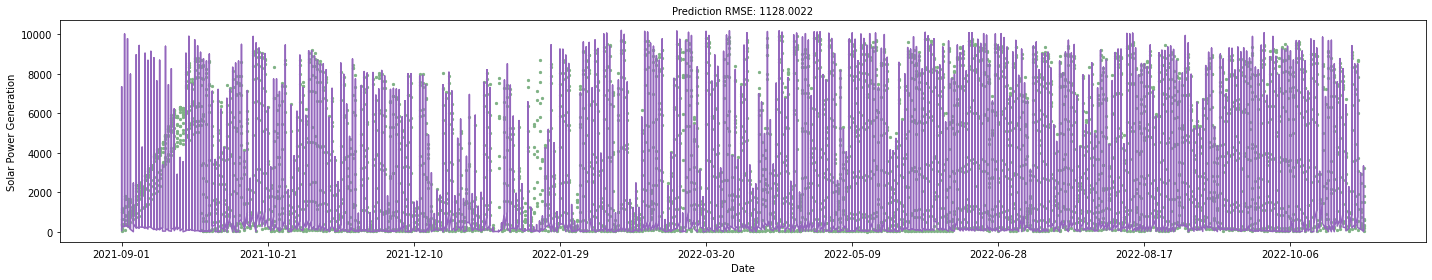

In [ ]:
# plot
plot_predictions(test_stdf, y_test, rf_500.predict(xst_test))

### SVD Data

#### Train

In [ ]:
# Train the model on training data
rf_500.fit(xsvd_train, y_train)

#### Predict

In [ ]:
ysvd_pred_500 = rf_500.predict(xsvd_test)

#### Evaluate

In [ ]:
mae_500_svd = mean_absolute_error(y_test, ysvd_pred_500)
print('Mean Absolute Error (MAE):', round(mae_500_svd, 2))
# The model is the most accurate when its MAE is closer to 0.

In [ ]:
# accuracy
mape_500_svd = mean_absolute_percentage_error(y_test, ysvd_pred_500)
print('Mean Absolute Percentage Error (MAPE):', round(mape_500_svd, 2))
# A MAPE score of less than 5% indicated that the model has great predictive power.
# In Scikit Learn Library
# Note here that the output is not a percentage in the range [0, 100] and a value
# of 100 does not mean 100% but 1e2. Furthermore, the output can be arbitrarily
# high when y_true is small (which is specific to the metric) or when
# abs(y_true - y_pred) is large (which is common for most regression metrics)

In [ ]:
rmse_500_svd = mean_squared_error(y_test, ysvd_pred_500, squared=False)
print('Root Mean Squared Error (RMSE):', round(rmse_500_svd, 2))

In [ ]:
r2_500_svd = r2_score(y_test, ysvd_pred_500)
print('R^2:', round(r2_500_svd, 2))
# The closer R^2 is to 1, the better the model fits to the data and the more accurate it is.

### SVD Data (not all columns)

#### Train

In [ ]:
# Train the model on training data
rf_500.fit(xsvdd_train, y_train)

RandomForestRegressor(max_features=4, min_samples_leaf=2, n_estimators=500,
                      random_state=42)

#### Predict

In [ ]:
ysvdd_pred_500 = rf_500.predict(xsvdd_test)

#### Evaluate

In [ ]:
mae_500_svdd = mean_absolute_error(y_test, ysvdd_pred_500)
print('Mean Absolute Error (MAE):', round(mae_500_svdd, 2))
# The model is the most accurate when its MAE is closer to 0.

Mean Absolute Error (MAE): 420.92


In [ ]:
# accuracy
mape_500_svdd = mean_absolute_percentage_error(y_test, ysvdd_pred_500)
print('Mean Absolute Percentage Error (MAPE):', round(mape_500_svdd, 2))
# A MAPE score of less than 5% indicated that the model has great predictive power.
# In Scikit Learn Library
# Note here that the output is not a percentage in the range [0, 100] and a value
# of 100 does not mean 100% but 1e2. Furthermore, the output can be arbitrarily
# high when y_true is small (which is specific to the metric) or when
# abs(y_true - y_pred) is large (which is common for most regression metrics)

Mean Absolute Percentage Error (MAPE): 1.5382642610228134e+17


In [ ]:
rmse_500_svdd = mean_squared_error(y_test, ysvdd_pred_500, squared=False)
print('Root Mean Squared Error (RMSE):', round(rmse_500_svdd, 2))

Root Mean Squared Error (RMSE): 846.56


In [ ]:
r2_500_svdd = r2_score(y_test, ysvdd_pred_500)
print('R^2:', round(r2_500_svdd, 2))
# The closer R^2 is to 1, the better the model fits to the data and the more accurate it is.

R^2: 0.92


### Daily Data - non-normalized

#### Train

In [ ]:
# Train the model on training data
rf_500.fit(xdaily_train, ydaily_train)

#### Predict

In [ ]:
ydaily_pred_500 = rf_500.predict(xdaily_test)

#### Evaluate

In [ ]:
mae_500_daily = mean_absolute_error(ydaily_test, ydaily_pred_500)
print('Mean Absolute Error (MAE):', round(mae_500_daily, 2))
# The model is the most accurate when its MAE is closer to 0.

In [ ]:
# accuracy
mape_500_daily = mean_absolute_percentage_error(ydaily_test, ydaily_pred_500)
print('Mean Absolute Percentage Error (MAPE):', round(mape_500_daily, 2))
# A MAPE score of less than 5% indicated that the model has great predictive power.
# In Scikit Learn Library
# Note here that the output is not a percentage in the range [0, 100] and a value
# of 100 does not mean 100% but 1e2. Furthermore, the output can be arbitrarily
# high when y_true is small (which is specific to the metric) or when
# abs(y_true - y_pred) is large (which is common for most regression metrics)

In [ ]:
rmse_500_daily = mean_squared_error(ydaily_test, ydaily_pred_500, squared=False)
print('Root Mean Squared Error (RMSE):', round(rmse_500_daily, 2))

In [ ]:
r2_500_daily = r2_score(ydaily_test, ydaily_pred_500)
print('R^2:', round(r2_500_daily, 2))
# The closer R^2 is to 1, the better the model fits to the data and the more accurate it is.

### Daily Data - Standardized

#### Train

In [ ]:
# Train the model on training data
rf_500.fit(xdaily_train_std, ydaily_train)

#### Predict

In [ ]:
ydaily_pred_500_std = rf_500.predict(xdaily_test_std)

#### Evaluate

In [ ]:
mae_500_daily_std = mean_absolute_error(ydaily_test, ydaily_pred_500_std)
print('Mean Absolute Error (MAE):', round(mae_500_daily_std, 2))
# The model is the most accurate when its MAE is closer to 0.

In [ ]:
# accuracy
mape_500_daily_std = mean_absolute_percentage_error(ydaily_test, ydaily_pred_500_std)
print('Mean Absolute Percentage Error (MAPE):', round(mape_500_daily_std, 2))
# A MAPE score of less than 5% indicated that the model has great predictive power.
# In Scikit Learn Library
# Note here that the output is not a percentage in the range [0, 100] and a value
# of 100 does not mean 100% but 1e2. Furthermore, the output can be arbitrarily
# high when y_true is small (which is specific to the metric) or when
# abs(y_true - y_pred) is large (which is common for most regression metrics)

In [ ]:
rmse_500_daily_std = mean_squared_error(ydaily_test, ydaily_pred_500_std, squared=False)
print('Root Mean Squared Error (RMSE):', round(rmse_500_daily_std, 2))

In [ ]:
r2_500_daily_std = r2_score(ydaily_test, ydaily_pred_500_std)
print('R^2:', round(r2_500_daily_std, 2))
# The closer R^2 is to 1, the better the model fits to the data and the more accurate it is.

## k-Cross Validation

In [ ]:
from sklearn.model_selection import KFold
import sklearn

In [ ]:
from sklearn.model_selection import cross_val_score
rf_500 = RandomForestRegressor(n_estimators=500, max_features=4, min_samples_leaf=2, random_state=42)
scores = cross_val_score(rf_500, xst_train, y_train, cv=10,scoring='r2')
scores


array([0.95040412, 0.97878886, 0.91134142, 0.91666231, 0.98837092,
       0.97346219, 0.9898527 , 0.97399224, 0.98501081, 0.98391103])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.97 accuracy with a standard deviation of 0.02


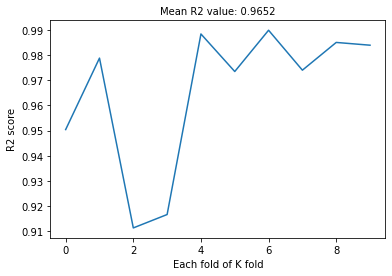

In [ ]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1)
x = np.arange(10)
y = scores
ax.set_ylabel('R2 score')
ax.set_xlabel('Each fold of K fold')
ax.set_title('Mean R2 value: {:.4f}'.format(scores.mean()), fontsize=10)
ax.plot(x,y)